# Data Visualization
Before jumping straight into the analysis of the data, it's a good idea to get a feel of your data. This is best done using data visualization toegether with some descriptive statistics. By getting a feel for the data, you can ask better, more informed questions. It also allows a clear way of presenting any discoveries to others, which is the whole point.

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
matplotlib.style.use('ggplot')

## basic plotting

<IPython.core.display.Javascript object>


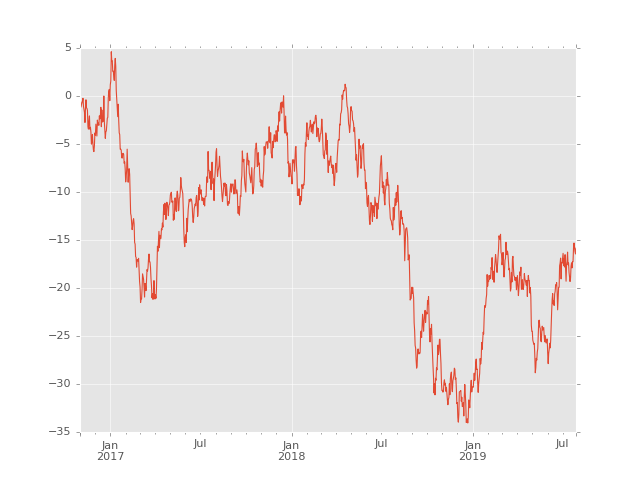

In [10]:
#Series
ts = pd.Series(np.random.randn(1000), index=pd.date_range('11/1/2016', periods = 1000))
#print(ts)#cols: date and randn
ts = ts.cumsum()#basically a random walk
ts.plot()

If we have a DataFrame, we can use plot to plot all columns with labels

<IPython.core.display.Javascript object>


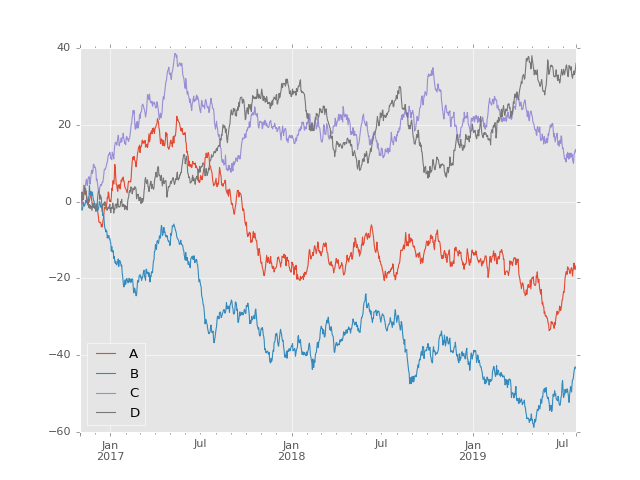

In [21]:
#DataFrame
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=list('ABCD'))
#DataFrame takes a np array, index are row names, columns are column names
df = df.cumsum()#make it like a random walk
df.plot();#df.figure()

In [22]:
df.head(5)#just a sanity check

,A,B,C,D
2016-11-01,0.004646,0.260336,0.382391,0.412165
2016-11-02,-0.353224,-1.469392,-0.700460,-0.817369
2016-11-03,-1.007779,-0.798864,-2.011398,1.107809
2016-11-04,0.771349,-2.067733,-0.957745,1.129245
2016-11-05,-0.688185,-2.224250,-0.391073,2.515247


plot column vs another

<IPython.core.display.Javascript object>


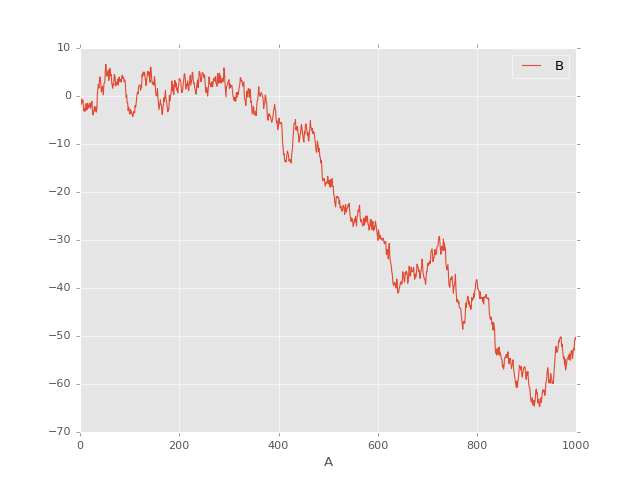

In [27]:
df3 = pd.DataFrame(np.random.randn(1000,2), columns=['B','C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))#a 1000 length pd.Series
df3.plot(x='A', y='B')

In [28]:
df3.head(5)

,B,C,A
0,-1.252196,-0.218002,0
1,-1.812590,0.512022,1
2,-0.607503,0.162963,2
3,-1.704258,0.558315,3
4,-1.222234,0.040880,4


## histograms
Drawn by using DataFrame.plot.hist() and Series.plot.hist()

<IPython.core.display.Javascript object>


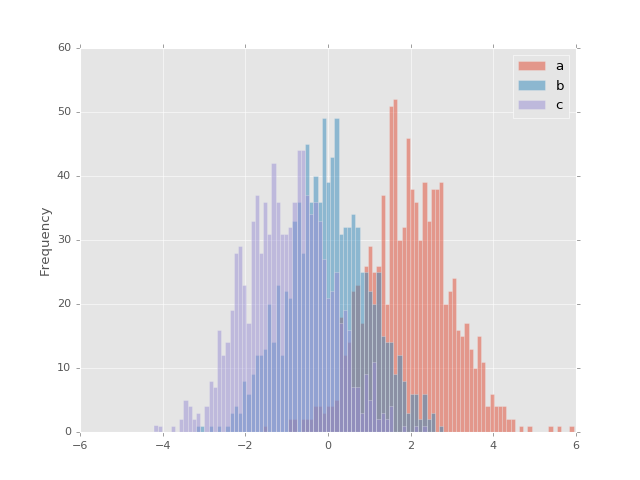

In [34]:
df4 = pd.DataFrame({
        'a':np.random.randn(1000)+2,
        'b':np.random.randn(1000),
        'c':np.random.randn(1000)-1
    }, columns=['a','b','c'])
#plt.figure();#I don't think I need this with inline plot
df4.plot.hist(alpha=.5, bins = 100)

## scatter plot
Use DataFrame.plot.scatter() which requires numeric columns for x and y

<IPython.core.display.Javascript object>


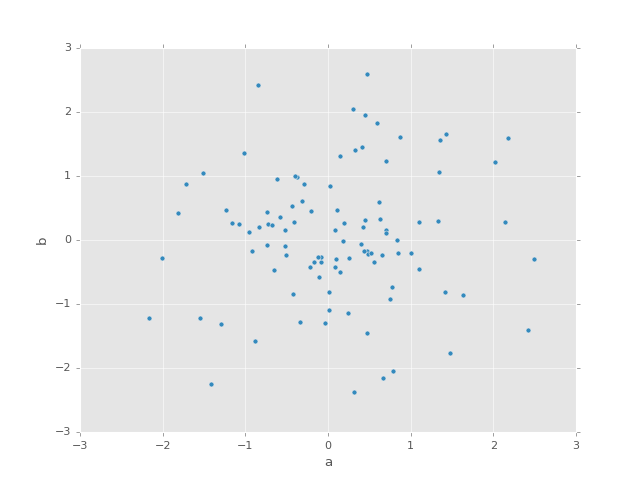

In [38]:
df = pd.DataFrame(np.random.randn(100,4), columns=list('abcd'))
df.plot.scatter(x='a', y='b')

<IPython.core.display.Javascript object>


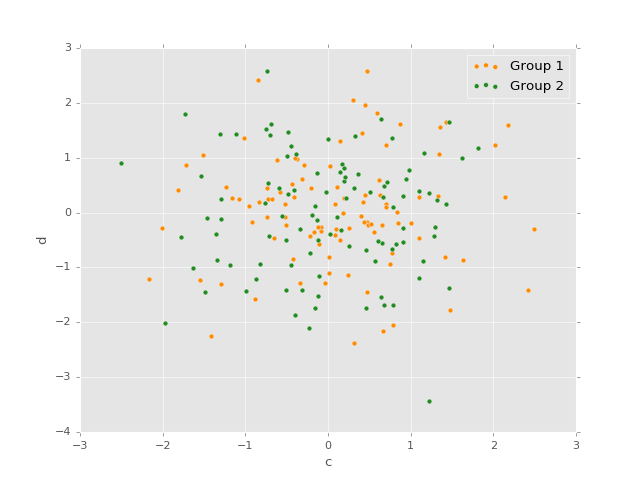

In [48]:
#or plot muliple columns on a single axis, repeat plot method specifying target ax
ax = df.plot.scatter(x='a',y='b', color='DarkOrange',label='Group 1')
df.plot.scatter(x='c',y='d', color='forestgreen', label='Group 2', ax=ax)

<IPython.core.display.Javascript object>


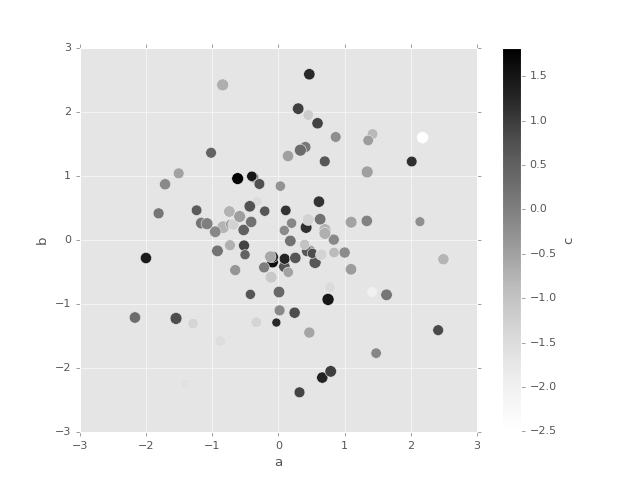

In [57]:
#c for color for each point, s for size
df.plot.scatter(x='a',y='b',c='c',s=(df['d']+10)*10)

<IPython.core.display.Javascript object>


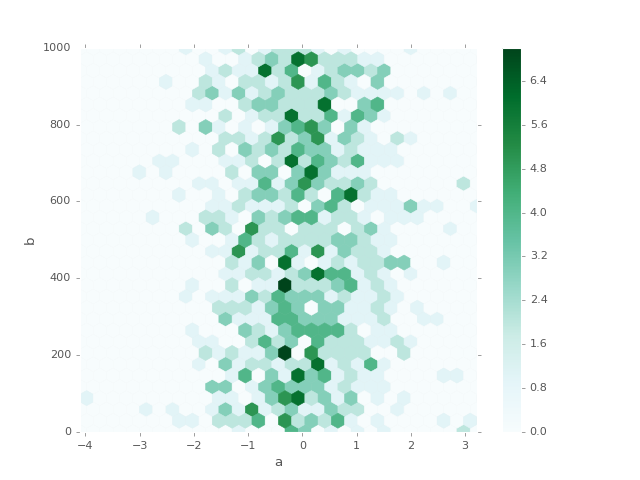

In [79]:
#hex plots are useful when plot is too dense to distinguish between points
df = pd.DataFrame(np.random.randn(1000,2), columns=['a','b'])
df['b'] = df['b'] + np.arange(1000)#arange returns evenly spaced values 
df.plot.hexbin(x='a',y='b',gridsize=30)

In [64]:
df.head(5)

,a,b
0,0.205532,-0.493490
1,3.008765,1.242169
2,0.246308,2.604009
3,0.658248,1.972886
4,0.334364,5.803460


## pie plot

<IPython.core.display.Javascript object>


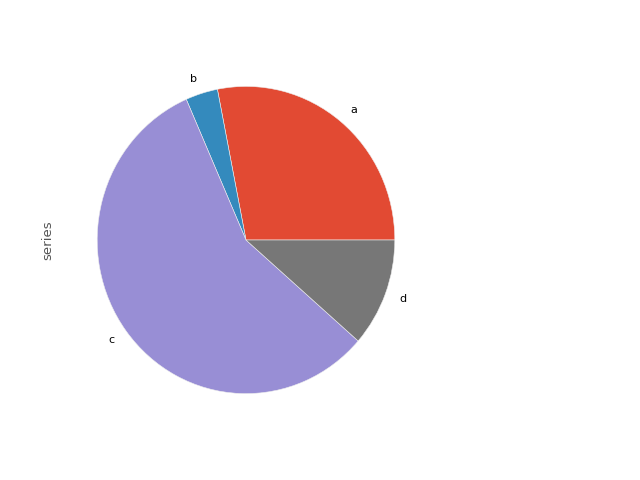

In [81]:
#pie plot
series = pd.Series(3*np.random.rand(4), index=list('abcd'), name='series')#uniform dist rather than normal
plt.figure()#without this, will overwrite previous plot 
series.plot.pie(figsize=(6,6))

## scatter matrix plot

<IPython.core.display.Javascript object>


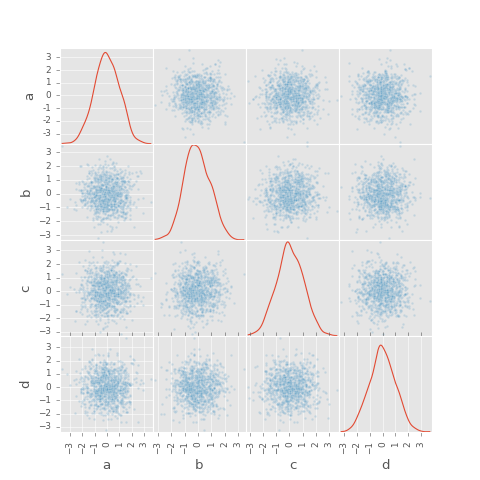

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73a30637b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f73a2c6ea58>]], dtype=object)

In [97]:
from pandas.tools.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000,4), columns=list('abcd'))
#this may take a noticeable amount of time
scatter_matrix(df, alpha=.2, figsize=(6,6),diagonal='kde')#kernel density estiamtion

## Andrews plot
An Andrews curve allows structure visualization for high dimensional data. Each data point $x={x_1, x_2, \cdots, x_d}$ defines a finite fourier series $$f_x(t) = \frac{x_1}{\sqrt{2}} + x_2 sin(t) + x_3 cos(t) + \cdots$$
which is then plotted for $-\pi < t < \pi$. Each data point can be viewed as a curve between $-\pi$ and $\pi$. We can think of this as a projection of the datapoint onto the vector $$\left(\frac{1}{\sqrt{2}}, sin(t), cos(t), \cdots\right)$$

<IPython.core.display.Javascript object>


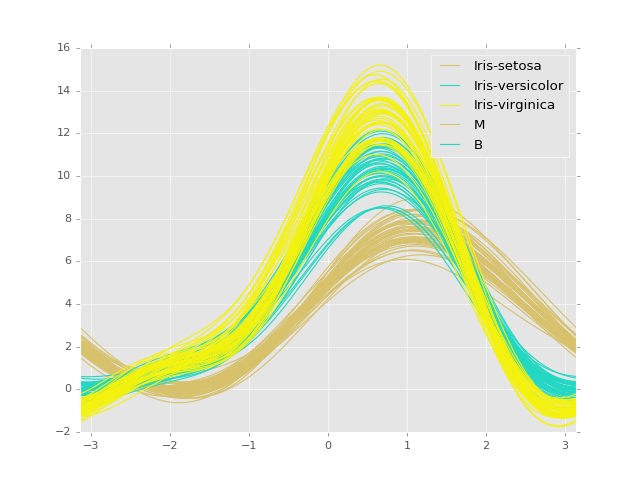

In [109]:
from pandas.tools.plotting import andrews_curves
#from sklearn import datasets
#iris = datasets.load_iris()
data = pd.read_csv('/home/kevin/Documents/data/iris.csv')
#data
plt.figure()
andrews_curves(data, 'Name')

<IPython.core.display.Javascript object>


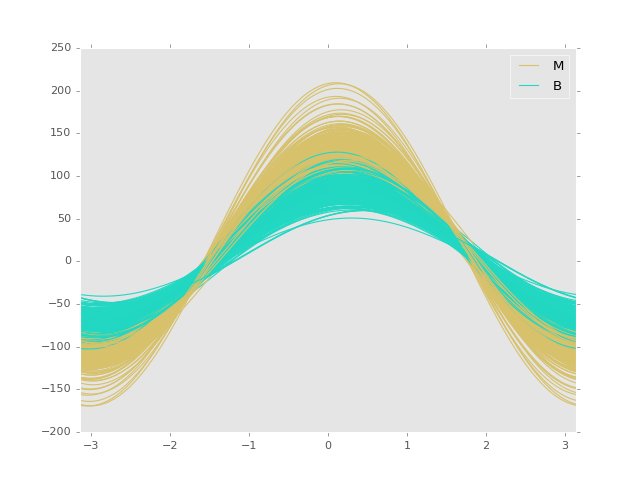

In [136]:
#try on another dataset
data2 = pd.read_csv('/home/kevin/Documents/data/breastcancer/data.csv')
plt.figure()
andrews_curves(data2[[1,2,3,4]],'diagnosis')#remove id
#running directly shows nothing, we probably normalize the data first convert strings to float
#from sklearn import preprocessing

## parallel coordinates
Another method for plotting multivariate data of moderate sizes. Allows us to see clusterss in data. Each vertical line represents an attribute. 1 set of connected line segments represents 1 data point.

<IPython.core.display.Javascript object>


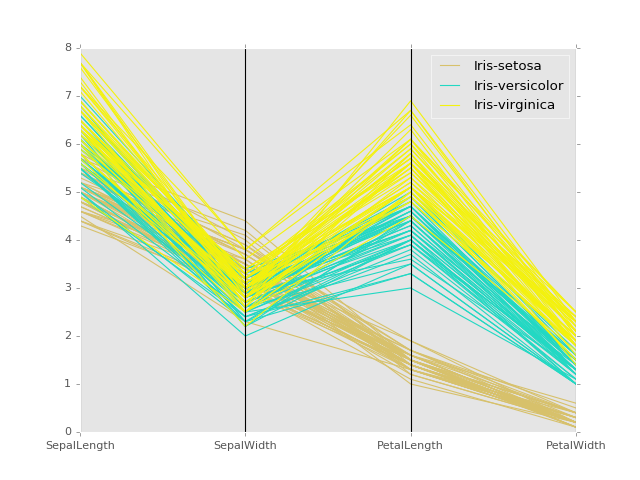

In [137]:
from pandas.tools.plotting import parallel_coordinates
data = pd.read_csv('/home/kevin/Documents/data/iris.csv')
plt.figure()#need to prevent overwriting of previous plot
parallel_coordinates(data,'Name')
#it seems like versicolor and virginica are 'more similar' than setosa in their petals

## more advanced plotting (to be continued)